## Figure 2
Laboratory data used for calibration and best fit curves for each model of surface-partitioning by organics. RMSE shown in plot legend.

In [3]:
import numpy as np
import os
from matplotlib import pylab

from PySDM.physics import si

from PySDM_examples.Singer_Ward.kappa_mcmc import get_model, param_transform
from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark
from PySDM_examples.Singer_Ward.mcmc_plots import plot_param_chain, plot_corner, plot_ovf_kappa_fit, plot_keff
from PySDM_examples.Singer_Ward.mcmc_plots import plot_ovf_kappa_fit

filename = "bcary_dark.csv"

# model = "CompressedFilmOvadnevaite"
# N = 1000
model = "SzyszkowskiLangmuir"
N = 1500
# model = "CompressedFilmRuehl"
# N = 5000

######
# open data file
######
ds = np.loadtxt("data/" + filename, skiprows=1, delimiter=",")
if filename == "bcary_dark.csv":
    ds = np.delete(ds, [26, 65], axis=0)  # remove outliers
r_dry = ds[:, 0] / 2 * 1e-9
ovf = np.minimum(ds[:, 1], 0.99)
d_ovf = ds[:, 2]
kappa_eff = ds[:, 3]
d_kappa_eff = ds[:, 4]
T = 300 * si.K

datay = kappa_eff
errory = d_kappa_eff

from PySDM.physics import constants_defaults
CONSTANTS = {
    'Mv': constants_defaults.Mv,
    'rho_w': constants_defaults.rho_w
}
WATER_MOLAR_VOLUME = CONSTANTS['Mv'] / CONSTANTS['rho_w']
aerosol_list = [AerosolBetaCaryophylleneDark(water_molar_volume=WATER_MOLAR_VOLUME, Forg=ovfi) for ovfi in ovf]
args = [T, r_dry, ovf, aerosol_list, model]

modelname = model.split("CompressedFilm")[-1]
aerosolname = aerosol_list[0].__class__.__name__.split("Aerosol")[-1]
outputfile = "mcmc_output/" + aerosolname + "_" + modelname + "_chain" + str(N) + ".csv"
param_chain = np.loadtxt(outputfile, delimiter=",").T

# plot_param_chain(param_chain, args, savetxt=False)

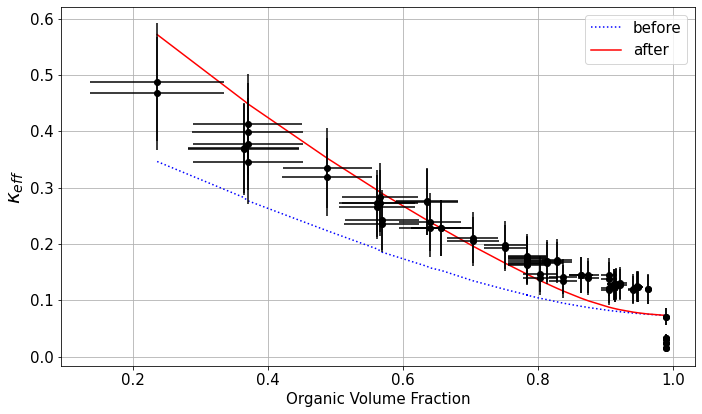

In [4]:
_, _, ovf, c, model = args

# create aerosol
dat = np.zeros((len(ovf), 4))

pylab.figure(figsize=(10, 6))

# before
kap_eff = get_model(param_chain[:, 0], args)
s = np.argsort(ovf)
dat[:, 0] = ovf[s]
dat[:, 2] = kap_eff[s]
pylab.plot(ovf[s], kap_eff[s], "b:", label="before")

# after
kap_eff2 = get_model(param_chain[:, -1], args)
dat[:, 3] = kap_eff2[s]
pylab.plot(ovf[s], kap_eff2[s], "r-", label="after")

# data
s = np.argsort(ovf)
dat[:, 1] = datay[s]
pylab.errorbar(ovf, datay, yerr=errory, xerr=d_ovf, fmt="ko")

pylab.legend()
pylab.xlabel("Organic Volume Fraction")
pylab.ylabel(r"$\kappa_{eff}$", fontsize=20)
pylab.rcParams.update({"font.size": 15})
pylab.grid()
pylab.tight_layout()

modelname = model.split("CompressedFilm")[-1]
aerosolname = c[0].__class__.__name__.split("Aerosol")[-1]
# pylab.savefig(
#     "mcmc_output/" + aerosolname + "_" + modelname + "_fit.png",
#     dpi=200,
#     bbox_inches="tight",
#     facecolor="w",
# )
pylab.show()